
## Application:PREDICTION DE DIABETE 
## 1.Objectif de l'application:
L’objectif est de prédire si oui ou non un patient est atteint du diabète à partir de certains attributs : âge, nombre de grossesses, taux d’insuline,etc. 


## A.	Plan de réalisation
i.	Effectuer un prétraitement pour uniformiser les données traitées.

ii.	Visualiser les données pour montrer le degré d’influence d’un attribut par rapport à la classe finale. Ceci est facilement réalisable grâce à matplot.pyplot et pyplot scatter. (Voir la suite de ce notebook). Réaliser plusieurs visualisations pour les variables de votre choix.
    
iii. Choisir les variables d’entrainement / la variable cible.

iv.	Découper votre jeu de données en deux parties : entrainement et teste.

v.	Mettre en œuvre l’algorithme d’apprentissage : arbre de décision. Calculer le taux d’accuracy et son temps d’exécution. (Vous pouvez utiliser la lib sklearn).



## 2.	À PROPOS DU JEUX DE DONNEES
L'objectif de l'ensemble de données est de prédire avec un diagnostique si un patient est atteint du diabète. 
Plusieurs contraintes ont été placées sur la sélection de ces instances dans une base de données plus grande. En particulier, tous les patients ici sont des femmes âgées d'au moins 21 ans.

Les ensembles de données comprennent plusieurs variables prédictives médicales et une variable cible, « Outcome ». 
Les variables prédictives comprennent le nombre de grossesses que le patient a eues, son IMC, son taux d'insuline, son âge, etc.

Chaque ligne représente un patient et les colonnes sont :
-	Grossesses: nombre de fois enceintes
-	Glucose: Concentration en glucose plasmatique 2 heures dans un test de tolérance au glucose par voie orale
-	BloodPressure: pression artérielle diastolique (mm Hg)
-	SkinThickness: Épaisseur du pli cutané des triceps (mm)
-	Insuline: insuline sérique de 2 heures (mu U / ml)
-	IMC: indice de masse corporelle (poids en kg / (taille en m) ^ 2)
-	DiabetesPedigreeFunction: Fonction pedigree du diabète
-	Age: Age (ans)
-	Résultat: Variable de classe (0 ou 1).


# Guide de réalisation de l'application
## étape 1 : Lecture des données

Grace à la LIB : 'pandas' on peut manipuler notre jeux de données: lire, ecrire, stocker, visualiser, supprimer des lignes, des colonnes, créer des dataframes, ...etc.

In [2]:
# importer la lib pandas pour le traitement sur le jeux de données
import pandas as pd



In [3]:
# read the csv-formatted data file into a pandas dataframe
df=pd.read_csv('diabetes.csv')
# get shape of data frame
print('Shape (n_rows,n_columns) of dataframe:',df.shape)
# print top 5 rows of data frame
df.head()

Shape (n_rows,n_columns) of dataframe: (768, 9)


,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


## Manipuler le jeux de données en utilisant quelques commandes de Pandas 

### On séléctionne une (ou plusieurs) colonne(s) comme un nouveau dataframe et on affiche uniquement les 5 premières lignes.


In [4]:
df2=df[['Outcome','Pregnancies','Insulin']].head()
df2

,Outcome,Pregnancies,Insulin
0,1,6,0
1,0,1,0
2,1,8,0
3,0,1,94
4,1,0,168


In [5]:
df3=df[['Age']].head()
df3

,Age
0,50
1,31
2,32
3,21
4,33


### On séléctionne les données qui satisfont une condition, en calculant leur quantité.


In [5]:
# Le premier élément est le nombre de lignes, le second est celui de colonnes:
print(df[df.BMI>30].shape) 
# le premier élément (nbr lignes) a pour index 0, le second (nbr colonnes) 1.
print('The number of rows where BMI>30 = ',df[df.BMI>30].shape[0]) 

(465, 9)
The number of rows where BMI>30 =  465


In [6]:
df[df.BMI<10].head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
9,8,125,96,0,0,0.0,0.232,54,1
49,7,105,0,0,0,0.0,0.305,24,0
60,2,84,0,0,0,0.0,0.304,21,0
81,2,74,0,0,0,0.0,0.102,22,0
145,0,102,75,23,0,0.0,0.572,21,0


In [6]:
#On peut observer le comportement par défaut avec cette commande :
df.BMI>30

0       True
1      False
2      False
3      False
4       True
       ...  
763     True
764     True
765    False
766     True
767     True
Name: BMI, Length: 768, dtype: bool

# Exercice 1
## Question 1
### 1-Faire une sélection des données qui ont leur glucose supérieur à 90,
### 2-Faire une sélection des données qui ont leur glucose entre 90 et 130,
### 3-Sélectionner uniquement les colonnes: Outcome, BMI, and Age, 
### 4-Sélectionner uniquement les 8 premières lignes de chaque affichage.

In [7]:
# Select data where glucose level is greater than 90
df_glucose_gt_90 = df[df['Glucose'] > 90]

# Select data where glucose level is between 90 and 130
df_glucose_90_130 = df[(df['Glucose'] >= 90) & (df['Glucose'] <= 130)]

# Select only the columns 'Outcome', 'BMI', and 'Age'
df_selected_cols = df[['Outcome', 'BMI', 'Age']]

# Display the first 8 rows of each selection
print("Data where glucose level is greater than 90:")
print(df_glucose_gt_90.head(8))
print("\nData where glucose level is between 90 and 130:")
print(df_glucose_90_130.head(8))
print("\nData with only the columns 'Outcome', 'BMI', and 'Age':")
print(df_selected_cols.head(8))

Data where glucose level is greater than 90:
    Pregnancies  Glucose  BloodPressure  SkinThickness  Insulin   BMI   
0             6      148             72             35        0  33.6  \
2             8      183             64              0        0  23.3   
4             0      137             40             35      168  43.1   
5             5      116             74              0        0  25.6   
7            10      115              0              0        0  35.3   
8             2      197             70             45      543  30.5   
9             8      125             96              0        0   0.0   
10            4      110             92              0        0  37.6   

    DiabetesPedigreeFunction  Age  Outcome  
0                      0.627   50        1  
2                      0.672   32        1  
4                      2.288   33        1  
5                      0.201   30        0  
7                      0.134   29        0  
8                      0.15

## Question 2
### 1-Sélectionner les données qui ont Outcome = 1 et Pregnancies>0,
### 2-Sélectionner uniquement les colonnes Glucose et BloodPressure, 
### 3-Afficher les 3 premieres lignes du dataframe résultant.

In [9]:
# Select data where Outcome is 1 and Pregnancies is greater than 0
df_selected = df[(df['Outcome'] == 1) & (df['Pregnancies'] > 0)]

# Select only the columns 'Glucose' and 'BloodPressure'
df_selected = df_selected[['Glucose', 'BloodPressure']]

# Display the first 3 rows of the resulting dataframe
print(df_selected.head(3))


   Glucose  BloodPressure
0      148             72
2      183             64
6       78             50


## Question 3: 

Combien de personnes (dans ce jeux de données) sont atteintes du diabète et qui ont une tension artérielle (BloodPressure) supérieur à 70 ?  


In [8]:
# Select data where Outcome is 1 (diabetes) and BloodPressure is greater than 70
df_selected = df[(df['Outcome'] == 1) & (df['BloodPressure'] > 70)]

# Get the number of rows in the selected dataframe
num_people = df_selected.shape[0]

print("Nombre de personnes souffrant de diabète et d'une tension artérielle supérieure à 70 :", num_people)

Nombre de personnes souffrant de diabète et d'une tension artérielle supérieure à 70 : 159


### Savoir si notre jeux de données possède des champs vides (non renseignés) ?

In [9]:

df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [10]:
df.notnull().sum()

Pregnancies                 768
Glucose                     768
BloodPressure               768
SkinThickness               768
Insulin                     768
BMI                         768
DiabetesPedigreeFunction    768
Age                         768
Outcome                     768
dtype: int64

### On affiche la liste des colonnes

In [11]:
df.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'Insulin',
       'BMI', 'DiabetesPedigreeFunction', 'Age', 'Outcome'],
      dtype='object')

### On affiche le type de données des colonnes 

In [12]:
df.dtypes

Pregnancies                   int64
Glucose                       int64
BloodPressure                 int64
SkinThickness                 int64
Insulin                       int64
BMI                         float64
DiabetesPedigreeFunction    float64
Age                           int64
Outcome                       int64
dtype: object

### avoir un résumé statistique de notre data frame

In [13]:
df.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


Notez que le "nombre" de valeurs pour chaque colonne est le même que le nombre de lignes dans le bloc de données. Cela signifie qu'il n'y a pas de valeurs manquantes (NULL).

### combien de diagnostiques on a?

In [14]:
df.Outcome.value_counts()
#df.Insulin.value_counts()

Outcome
0    500
1    268
Name: count, dtype: int64

### Quelle est la moyenne de "SkinThickness" lorsque le outcome est égal à 1 ?

In [15]:
df[df.Outcome==1].SkinThickness.mean()

22.16417910447761

### Question 4:
Quel est le maximum de "BMI" lorsque l'on est pas atteint du diabète? 

In [16]:
# Select data where Outcome is 0 (non-diabetic)
df_non_diabetic = df[df['Outcome'] == 0]

# Find the maximum BMI among non-diabetic individuals
max_bmi_non_diabetic = df_non_diabetic['BMI'].max()

print("IMC maximal pour les personnes non diabétiques :", max_bmi_non_diabetic)


IMC maximal pour les personnes non diabétiques : 57.3


## étape2 : Visualisation des données

La visualisation des données est une étape très importante dans l'analyse des données. 


In [17]:
# get a plotting library
import matplotlib.pyplot as plt
# make it interactive in the notebook
# (Only for matplot online)
%matplotlib inline 

Text(0, 0.5, 'BloodPressure')

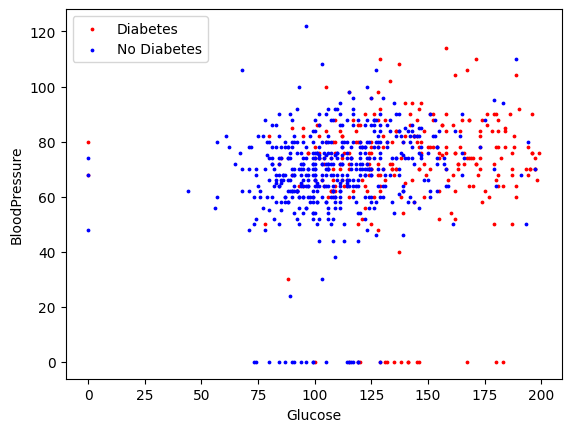

In [18]:

# plot Glucose vs BloodPressure and color points according to Outcome
plt.figure()
plt.scatter(df[df.Outcome==1].Glucose,df[df.Outcome==1].BloodPressure,label='Diabetes',color='r',s=3)
plt.scatter(df[df.Outcome==0].Glucose,df[df.Outcome==0].BloodPressure,label='No Diabetes',color='b',s=3)
plt.legend()
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')

Remarquez qu'on peut constater que plus le taux de glucose est elevé, plus l'enregistrement est associé à un diabète (résultat = 1, points rouges), tandis que plus il est bas, et plus il est associé à l'absence du diabète (résultat = 0, points bleus).

On constate qu'il y a un ensemble de points de valeur 0 pour Glucose et un autre de valeur 0 pour BloodPressure. Cela n'a pas de sens physiquement. Il semble que ces données ont été remplies avec 0 alors que la valeur aurait dû être NULL. On vérifie combien de zéros apparaissent dans chaque colonne.

In [19]:
for c in df.columns:
    print('Pour la colonne',c,' il y a',df[df[c]==0][c].count(),'valeurs nulles.')

Pour la colonne Pregnancies  il y a 111 valeurs nulles.
Pour la colonne Glucose  il y a 5 valeurs nulles.
Pour la colonne BloodPressure  il y a 35 valeurs nulles.
Pour la colonne SkinThickness  il y a 227 valeurs nulles.
Pour la colonne Insulin  il y a 374 valeurs nulles.
Pour la colonne BMI  il y a 11 valeurs nulles.
Pour la colonne DiabetesPedigreeFunction  il y a 0 valeurs nulles.
Pour la colonne Age  il y a 0 valeurs nulles.
Pour la colonne Outcome  il y a 500 valeurs nulles.


Pour certaines de ces colonnes, zéro a un sens, comme pour le nombre de grossesses (Pregnancies) et le résultat (Outcome). Mais pour d'autres colonnes, comme BloodPressure ou BMI, zéro n'a absolument aucun sens. Examinons de plus près les données en dessinant un histogramme des valeurs des données pour chaque colonne.

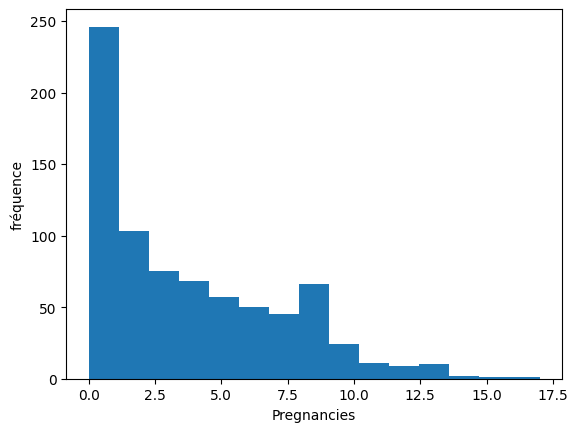

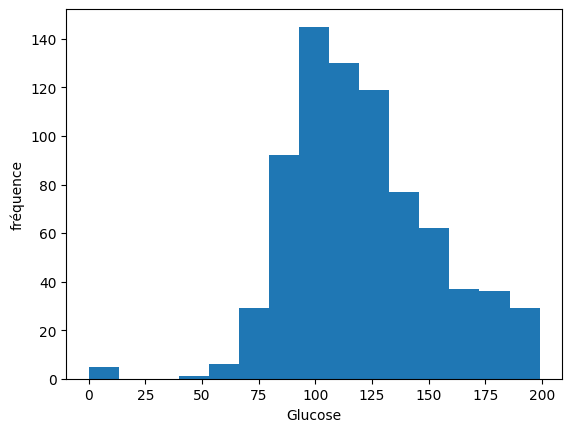

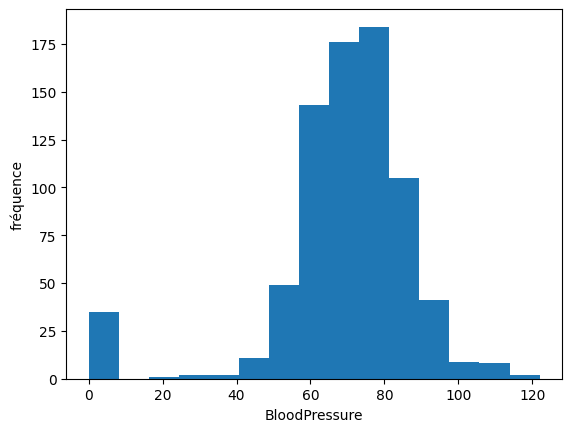

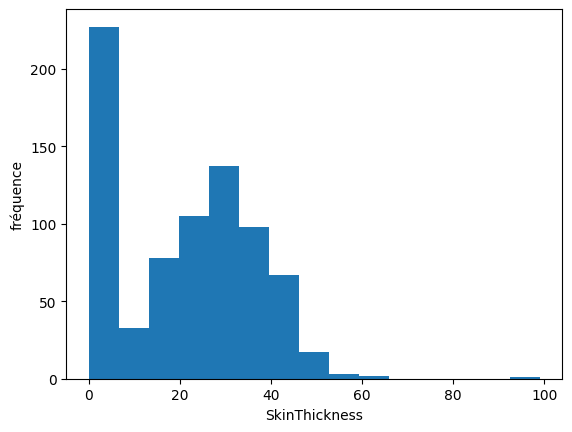

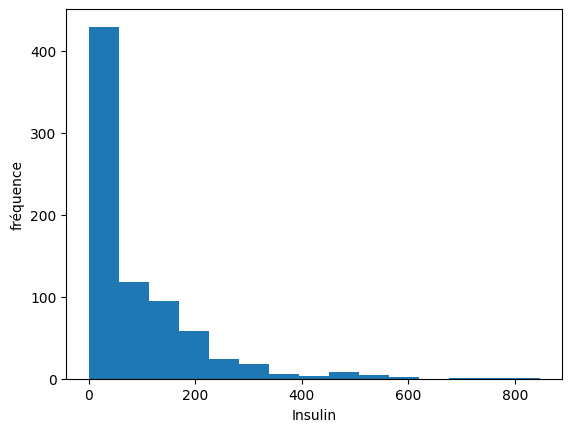

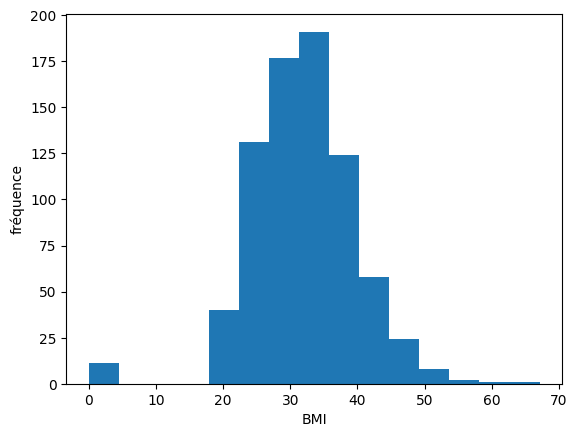

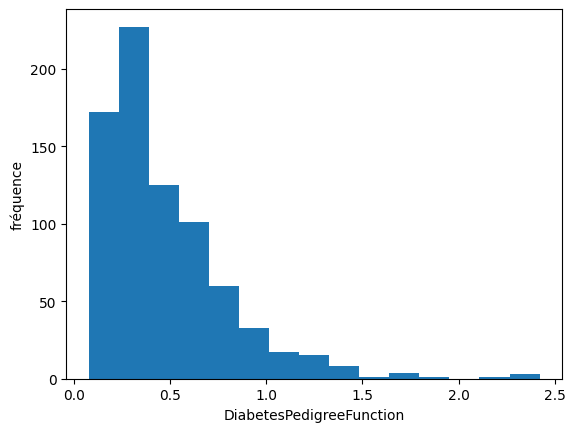

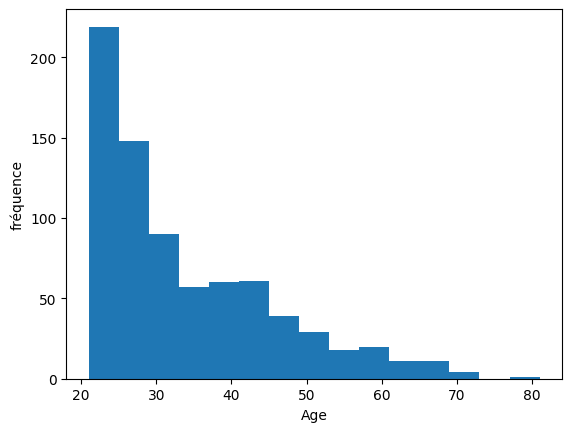

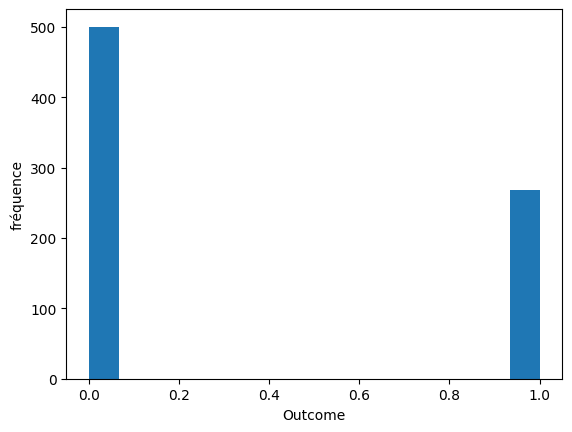

In [20]:
for c in df.columns:
    plt.figure()
    plt.hist(df[c],bins=15)
    plt.xlabel(c)
    plt.ylabel('fréquence')
    plt.show()

À partir de ces histogrammes, il semble que bon nombre de valeurs nulles sont en effet des données manquantes qui auraient dû être étiquetées NULL, et devront être prises en compte avant que nous formions un modèle pour classer les données.

De plus, nous pouvons remarquer que la colonne Insuline n'a que 374 valeurs renseignées (sur un total de 768 lignes), soit presque 50% des valeurs sont des zéro.

Lors de la construction d'un modèle, nous allons d'abord supprimer la colonne d'insuline, car beaucoup de valeurs sont manquantes. Ensuite, nous supprimerons (remplacer) les zéros dans les colonnes où zéro n'a pas de sens. Nous ferons le choix d'utiliser la moyenne (moyenne) des valeurs non nulles dans chaque colonne pour remplacer les valeurs nulles.
Nous traiterons dans l'étape 3 ces cas d'inconsistance de ces données.

NB: il ne faut pas oublier en analyse finale des résultats que ces hypothèses sont pertinentes (valides).


### EXERCISE 2 : 

### Question1. 
Inspecter les données vous-même en visualisant des nuages de points de différentes colonnes.

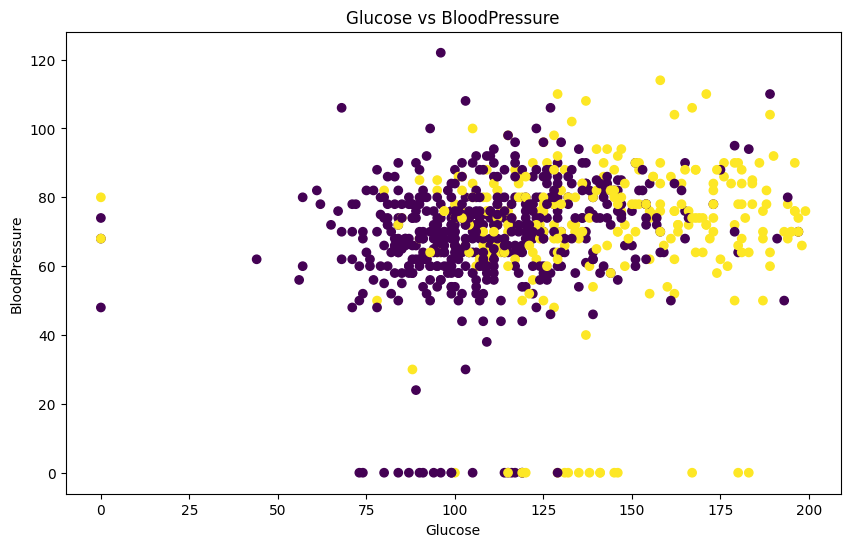

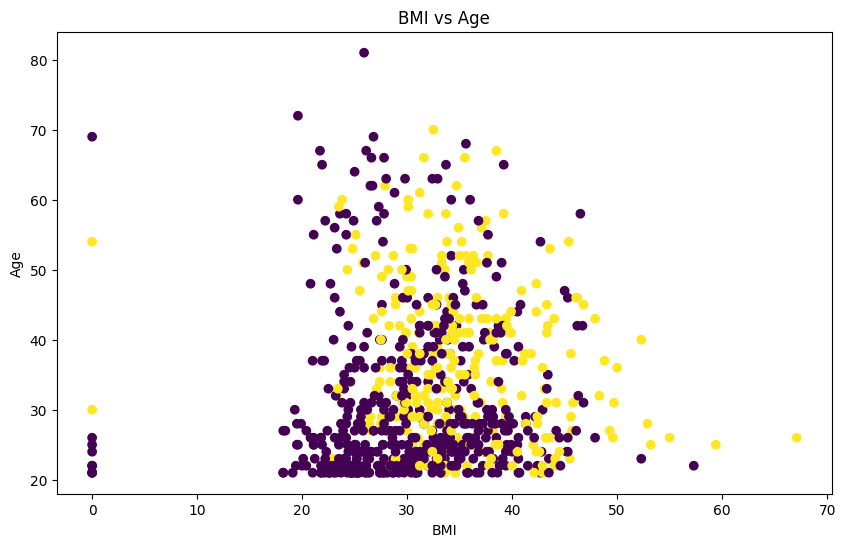

In [21]:
# Import matplotlib
import matplotlib.pyplot as plt

# Create a scatter plot of 'Glucose' vs 'BloodPressure'
plt.figure(figsize=(10, 6))
plt.scatter(df['Glucose'], df['BloodPressure'], c=df['Outcome'])
plt.xlabel('Glucose')
plt.ylabel('BloodPressure')
plt.title('Glucose vs BloodPressure')
plt.show()

# Create a scatter plot of 'BMI' vs 'Age'
plt.figure(figsize=(10, 6))
plt.scatter(df['BMI'], df['Age'], c=df['Outcome'])
plt.xlabel('BMI')
plt.ylabel('Age')
plt.title('BMI vs Age')
plt.show()




### Chercher visuellement un attribut qui permetterait de séparer correctement les valeurs de Outcome (la colonne "target" ou "label"). Quelle valeur de cet attribut vous permet alors de découper le dataframe en diabète et non-diabète ?

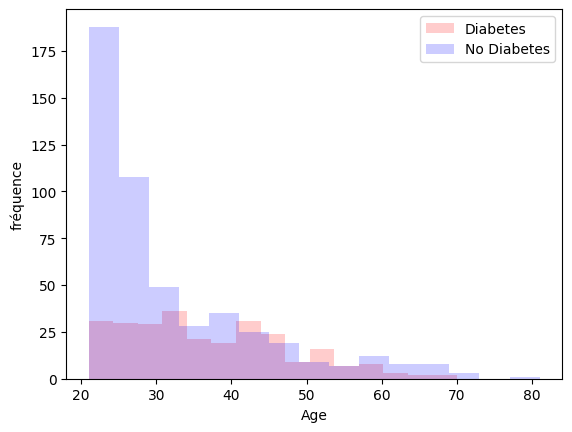

In [22]:
# example: plot histograms of Age for Outcome=1 and Outcome=0.
plt.figure()
plt.hist(df[df.Outcome==1]['Age'],bins=15,label='Diabetes',color='r',alpha=0.2)
plt.hist(df[df.Outcome==0]['Age'],bins=15,label='No Diabetes',color='b',alpha=0.2)
plt.xlabel('Age')
plt.ylabel('fréquence')
plt.legend()
plt.show()

### Question 2 : 
Choisir la colonne (l'attribut) qui, pour vous, maximise le taux de précision (accuracy). Dans notre cas, on fait l'hypothèse que l'age est l'attribut discriminant, avec un seuil à 30 ans.


Quel est le degré de précision de votre classificateur en utilisant seulement 1 division? (comment calculer son taux d'accuracy?)

In [24]:
import numpy as np
# example
# create a new column in the data frame with the predicted outcome based on your split (here, Age<30 means outcome=0, otherwise outcome=1)
df['PredictedOutcome']=np.where(df.Age<30,0,1) # np.where(condition, value if true, value if false)
# calculate accuracy
N_correct=df[df.PredictedOutcome==df.Outcome].shape[0]
N_total=df.shape[0]
accuracy=N_correct/N_total
print('nombre d\'exemples corrects =',N_correct)
print('nombre d\'exemples au total =',N_total)
print('accuracy =',accuracy)

nombre d'exemples corrects = 496
nombre d'exemples au total = 768
accuracy = 0.6458333333333334


Il existe plusieurs mesures pour calculer la qualité d'un classificateur.

### Étape 3 :
  Division de l'ensemble de données en un ensemble d'entrainement et un ensemble de test (TRAIN/TEST)


In [25]:
# avec la fonction train_test_split de sklearn on peut facilement diviser notre dataframe en ensembles train/test 
import sklearn
from sklearn.model_selection import train_test_split
# 0,3 pour préciser que 30% seront pour l'ensemble de test et 70% pour l'entrainement
train, test = train_test_split(df, test_size = 0.3, random_state = 0) 

train.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome,PredictedOutcome
count,537.000000,537.000000,537.000000,537.000000,537.000000,537.000000,537.00000,537.000000,537.000000,537.000000
mean,3.854749,121.543762,69.666667,21.031657,84.901304,32.255121,0.47132,33.670391,0.361266,0.493482
std,3.405075,32.242413,19.464823,16.030548,118.601111,8.034497,0.33441,12.003471,0.480815,0.500424
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.08400,21.000000,0.000000,0.000000
25%,1.000000,99.000000,64.000000,0.000000,0.000000,27.500000,0.24000,24.000000,0.000000,0.000000
50%,3.000000,118.000000,72.000000,24.000000,45.000000,32.400000,0.37800,29.000000,0.000000,0.000000
75%,6.000000,142.000000,80.000000,33.000000,135.000000,36.800000,0.61300,41.000000,1.000000,1.000000
max,17.000000,198.000000,122.000000,99.000000,846.000000,67.100000,2.42000,81.000000,1.000000,1.000000


In [26]:
train.drop('Insulin',axis=1,inplace=True)
test.drop('Insulin',axis=1,inplace=True) # axis=1 veut dire supprimer la colonne pas la ligne
# check that Insulin is no longer in the list of columns
train.columns

Index(['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI',
       'DiabetesPedigreeFunction', 'Age', 'Outcome', 'PredictedOutcome'],
      dtype='object')

In [27]:
# La lib numpy offre plusieurs fonction très utiles, comme par exemple: elle nous permet de crèer une nouvelle colonne dans notre
# dataframe si une condition est satisfaite
import numpy as np

def imputeColumns(dataset):
    # create a list of columns that we will impute with the average non-zero value in each column
    columnsToImpute=['Glucose', 'BloodPressure', 'SkinThickness','BMI']

    for c in columnsToImpute:
        avgOfCol=dataset[dataset[c]>0][[c]].mean()
        dataset[c+'_imputed']=np.where(dataset[[c]]!=0,dataset[[c]],avgOfCol)

imputeColumns(train)
imputeColumns(test)
# check that we've imputed the 0 values  
train[train.Glucose==0][['Glucose','Glucose_imputed']].head()

,Glucose,Glucose_imputed
342,0,122.45591
502,0,122.45591
349,0,122.45591
182,0,122.45591


### étape 4:  
Extraction des attributs d'entrèe , et l'attribut cible

In [28]:
X_train = train[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness','BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_train = train[['Outcome']]
X_test = test[['Pregnancies', 'Glucose', 'BloodPressure', 'SkinThickness', 'BMI', 'DiabetesPedigreeFunction', 'Age']]
Y_test = test[['Outcome']]

### étape 5:
# La classification avec les arbres de decision

Nous allons voir un exemple de mise en oeuvre d'un classificateur d'arbre de décision pour le problème du diabète. L'objectif est de prédire sur la base de mesures diagnostiques si un patient est atteint de diabète ou non.

Nous construisons un modèle qui va faire des prédictions, nous devons donc trouver un moyen d'évaluer la qualité de ces prédictions . Étant donné que les prédictions par définition ne concernent que des données inédites, nous ne pouvons pas dépendre des données utilisées pour créer le modèle. Nous devons d’abord diviser le jeu de données en deux parties non croisées: les données de formation qui seront utilisées pour construire le modèle et les données de test pour évaluer les prédictions du modèle.

In [29]:
Y_train.describe()

,Outcome
count,537.000000
mean,0.361266
std,0.480815
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


In [30]:
Y_test.describe()

,Outcome
count,231.000000
mean,0.320346
std,0.467623
min,0.000000
25%,0.000000
50%,0.000000
75%,1.000000
max,1.000000


 Nous utilisons l'ensemble d'entrainement pour construire notre model pour les arbres de decision. Puis on va évaluer son score sur l'ensemble de teste. 

In [35]:
from sklearn.tree import DecisionTreeClassifier

# Create the classifier
decision_tree_classifier = DecisionTreeClassifier(random_state = 0)

# Train the classifier on the training set
decision_tree_classifier.fit(X_train, Y_train)

# Evaluate the classifier on the testing set using classification accuracy
print("Taux d'accuracy pour arbre de décision: ", decision_tree_classifier.score(X_test, Y_test))

Taux d'accuracy pour arbre de décision:  0.7402597402597403


In [33]:
import numpy as np
from scipy.spatial import distance
from collections import Counter

# Définition de la fonction KNN
def knn(X_train, Y_train, X_test, k):
    Y_pred = []
    for test_point in X_test:
        distances = []
        for train_point in X_train:
            dist = distance.euclidean(test_point, train_point)
            distances.append(dist)
        distances = np.array(distances)
        inds = np.argsort(distances)
        top_k = Y_train[inds[:k]]
        top_k = top_k.ravel()  # Convertir le tableau 2D en 1D
        most_common = Counter(top_k).most_common(1)
        Y_pred.append(most_common[0][0])
    return Y_pred

# Calcul du taux d'accuracy
def accuracy(Y_pred, Y_test):
    correct = 0
    for i in range(len(Y_pred)):
        if Y_pred[i] == Y_test[i]:
            correct += 1
    return correct / len(Y_pred)

# Utilisation de l'algorithme KNN
Y_pred = knn(X_train.values, Y_train.values.ravel(), X_test.values, k=5)
print("Taux d'accuracy pour KNN: ", accuracy(Y_pred, Y_test.values.ravel()))


Taux d'accuracy pour KNN:  0.7532467532467533
